Text(0, 0.5, 'close')

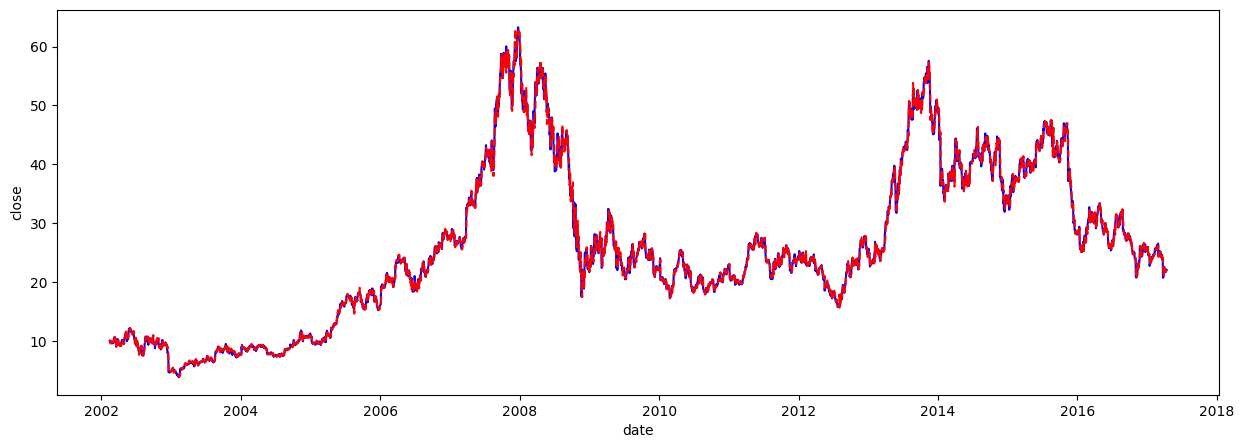

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


# lese fra GME_stocks.csv
df = pd.read_csv("GME_stock.csv")

# For å predikere fremtidige stockpris basert på historiske data, sorterer vi datasettet kronologisk etter dato
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date', ascending = True) 
df = df.reset_index(drop=True) #resetter index slik at vi går fra 0 til n etter dato og ikke etter gamle verdier

# splitter dataframe til en trainingsdata (80% av første rows, kronologisk rekkefølge) og testdata (20% av siste rows, kronologisk rekkefølge)
split = int(len(df)*0.8)
training_df = df.iloc[:split] # settet den skal lære fra
test_df = df.iloc[split:] # settet den skal predicte uten å lære fra

# lager to CSV_filer
training_df.to_csv("GME_stockTraining.csv", index=False)
test_df.to_csv("GME_stockTest.csv", index=False)





alt_train = training_df[['open_price', 'low_price', 'high_price', 'volume']].iloc[:-1]
close_actual = training_df['close_price'].iloc[1:]
close_actual = close_actual.reset_index(drop=True)

lin_reg = LinearRegression()
lin_reg.fit(alt_train, close_actual)
close_pred = lin_reg.predict(alt_train)


trainingDate = pd.to_datetime(training_df['date']).iloc[1:]
plt.figure(figsize=(15,5))
plt.plot(trainingDate, close_actual, color='blue')
plt.plot(trainingDate, close_pred, color='red', linestyle = "--")
plt.xlabel('date')
plt.ylabel('close')


# evaluering
print("interceptions: ", lin_reg.intercept_)
print("coefficients: ", lin_reg.coef_)
print("score: ", lin_reg.score(alt_train, close_actual))







We chose this a regression algorithm because when it comes to predicting the stock market is continious numbers and regression is about predicting numeric outcomes. 